<a href="https://colab.research.google.com/github/galmaigy/Stat2_MSDS6372_Project2_BreastCancer/blob/master/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))


Saving data.csv to data (1).csv


In [5]:
print(df.head())
#pd.set_option('display.max_columns', 30)
#delete ID
df.drop(['id'], axis = 1, inplace = True)

         id diagnosis  ...  symmetry_worst  fractal_dimension_worst
0    842302         M  ...          0.4601                  0.11890
1    842517         M  ...          0.2750                  0.08902
2  84300903         M  ...          0.3613                  0.08758
3  84348301         M  ...          0.6638                  0.17300
4  84358402         M  ...          0.2364                  0.07678

[5 rows x 32 columns]


In [6]:
# getting data size
print(df.shape)

(569, 31)


In [7]:
# basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [8]:
#checking datatypes of feature
print(df.diagnosis.dtypes)

object


In [9]:
# Summary of all with include = 'all'
print(df.describe(include = 'all'))

       diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
count        569   569.000000  ...      569.000000               569.000000
unique         2          NaN  ...             NaN                      NaN
top            B          NaN  ...             NaN                      NaN
freq         357          NaN  ...             NaN                      NaN
mean         NaN    14.127292  ...        0.290076                 0.083946
std          NaN     3.524049  ...        0.061867                 0.018061
min          NaN     6.981000  ...        0.156500                 0.055040
25%          NaN    11.700000  ...        0.250400                 0.071460
50%          NaN    13.370000  ...        0.282200                 0.080040
75%          NaN    15.780000  ...        0.317900                 0.092080
max          NaN    28.110000  ...        0.663800                 0.207500

[11 rows x 31 columns]


In [10]:
# count data for each feature
print(df.count())

diagnosis                  569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
dtype: int64


In [11]:
# count unique value for categorical variable(class in this case)
unique_values = df['diagnosis'].value_counts()
print(unique_values)

B    357
M    212
Name: diagnosis, dtype: int64


In [12]:
# coef features of first 10, 상관계수 계산
df1 = df.iloc[:,1:11] # or df1 = df.loc[:, radius_mean:fractal_dimension_mean]
df1.corr()
# to see if other features are correlated also
#print(df[['radius_worst', 'perimeter_worst']].corr())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


Text(0.5, 1.0, 'regression line of concave point_mean and radius_mean')

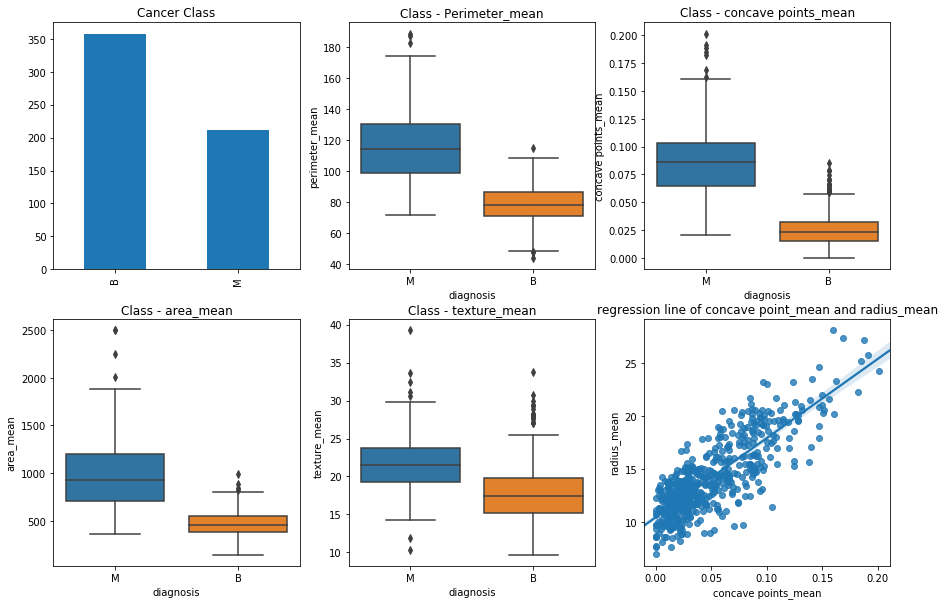

In [13]:
# EDA starts here
# figures
import matplotlib.pyplot as plt
import seaborn as sns

# style theme (dargrid, whitegrid, dark, white, ticks)
#sns.set_style('darkgrid')
# 그래프 각 개체 생성
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

# 그래프 그리기 - 선형 회귀선 표시(fit_reg=True)

unique_values.plot(kind='bar', ax=ax1)
sns.boxplot(x='diagnosis', y='perimeter_mean', data = df, ax = ax2 ) 
#sns.violinplot(x='diagnosis', y='perimeter_mean', data = df, ax = ax2 ) 
sns.boxplot(x='diagnosis', y='concave points_mean', data= df, ax = ax3)
sns.boxplot(x='diagnosis', y='area_mean', data= df, ax = ax4)
sns.boxplot(x='diagnosis', y='texture_mean', data= df, ax = ax5)
sns.regplot(x='concave points_mean', y='radius_mean', data = df, ax=ax6)
# charts name
ax1.set_title('Cancer Class')
ax2.set_title('Class - Perimeter_mean')
ax3.set_title('Class - concave points_mean')
ax4.set_title('Class - area_mean')
ax5.set_title('Class - texture_mean')
ax6.set_title('regression line of concave point_mean and radius_mean')



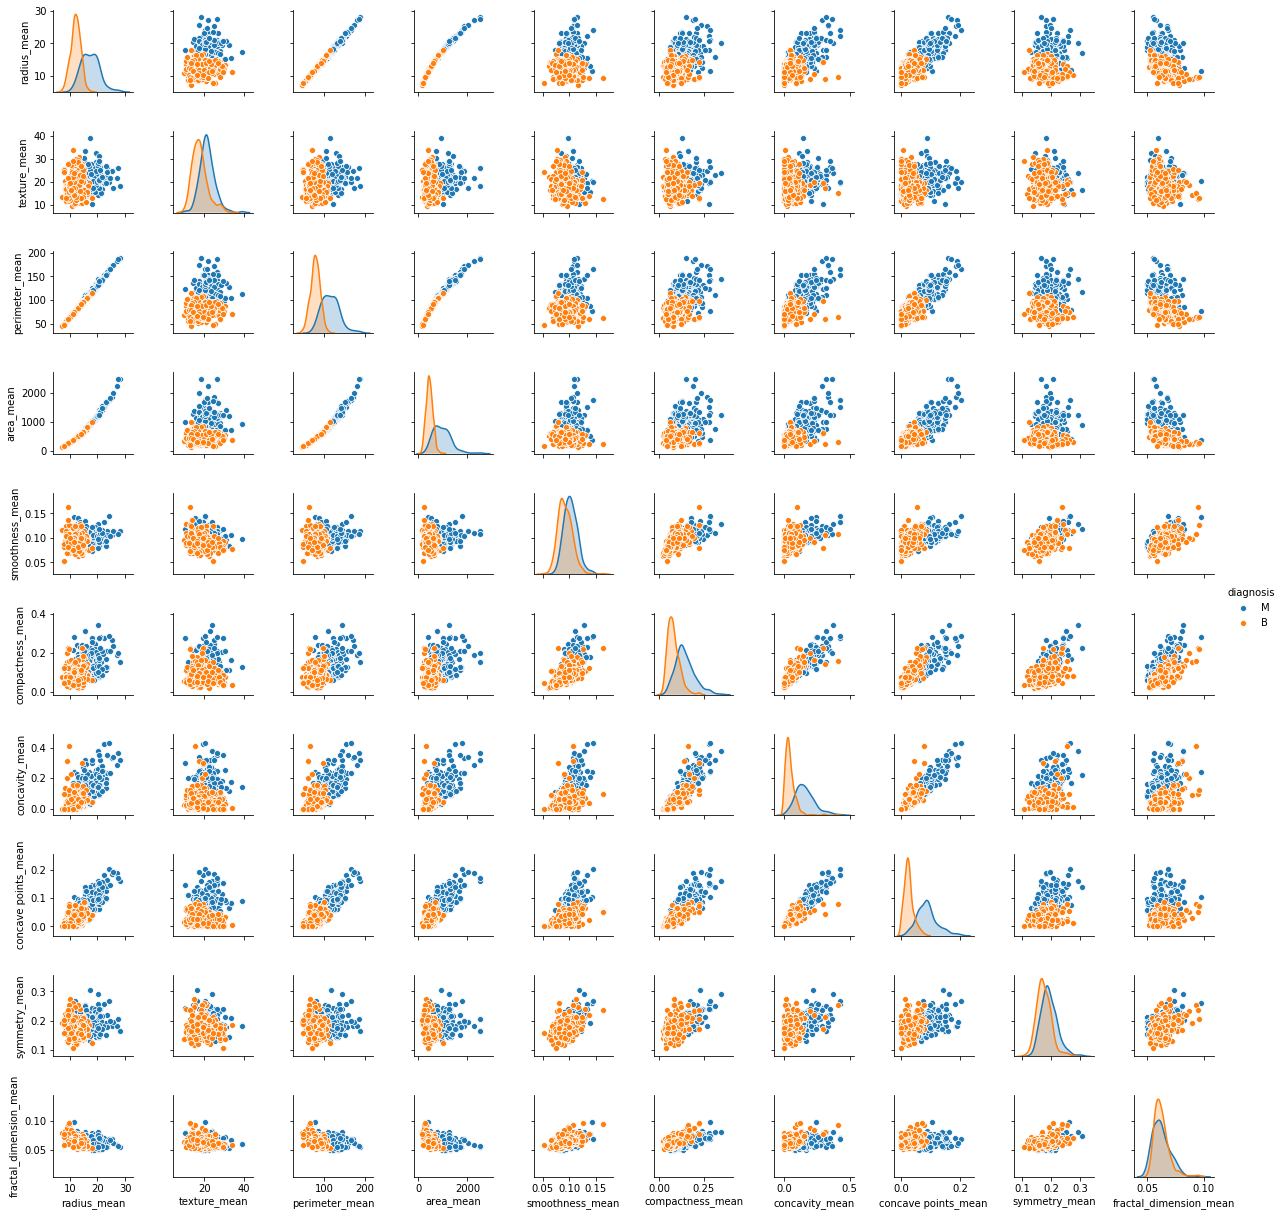

In [14]:
#pairplot

sns.pairplot(data=df.iloc[:,:11], hue='diagnosis', height=1.7) # hue:색상을 (class)로 달리 하여 PCA가 있을 것 같다는 확신을 준다.